# Titanic Survival Analysis-I

## Problem Statement

The dataset includes various types of features that can be categorised into demographic (e.g., Age, Sex), social (e.g., SibSp, Parch), and economic indicators (e.g., Pclass, Fare, Embarked). Perform a univariate analysis of the Titanic dataset to explore the individual characteristics of passengers, such as age distribution, passenger class composition, gender ratio, and survival rates. The objective is to understand the general patterns and trends within each variable.

Key Variables for Analysis:

Dependent Variable:
- Survived (whether a passenger survived or not)

Independent Variables:
- Pclass (Passenger class: socio-economic status)
- Sex (Gender)
- Age
- SibSp (Number of siblings/spouses aboard)
- Parch (Number of parents/children aboard)
- Fare
- Embarked (Port of embarkation)

### Assessing structure of the dataset

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df=pd.read_csv('titanic_dataset.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.shape

(891, 12)

In [5]:
df.head(10) #first 10 rows of dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
df.tail(5) #last five rows of dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df.sample(10) #random dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
522,523,0,3,"Lahoud, Mr. Sarkis",male,NaN,0,0,2624,7.2250,NaN,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C
603,604,0,3,"Torber, Mr. Ernst William",male,44.0,0,0,364511,8.0500,NaN,S
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
126,127,0,3,"McMahon, Mr. Martin",male,NaN,0,0,370372,7.7500,NaN,Q
421,422,0,3,"Charters, Mr. David",male,21.0,0,0,A/5. 13032,7.7333,NaN,Q
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S
707,708,1,1,"Calderhead, Mr. Edward Pennington",male,42.0,0,0,PC 17476,26.2875,E24,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


### Data Preprocessing

In [8]:
#Used to calculate the percentage of missing values in each column
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [9]:
#Dropping the column "Cabin"
df=df.drop("Cabin",axis=1)

In [10]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
dtype: float64

In [11]:
#Age column is filled with the median of the column to avoid any biases caused by extreme values
df["Age"]=df["Age"].fillna(df["Age"].median())

In [12]:
#Checking for null values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

After dropping `Cabin`, the proportion of missing values is checked again.
Missing values in the `Age` column are filled with the median of the column to avoid any biases caused by extreme values.

In [13]:
# Remaining rows with any missing values are dropped with
df=df.dropna()

In [14]:
#Verify that all missing values have been successfully removed
df.isnull().mean()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [15]:
# View the cleaned dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
#Check the number of unique values for each feature to better understand categorical and continuous variables
df.nunique()

PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         680
Fare           247
Embarked         3
dtype: int64

In [17]:
#Confirm the new dimensions of the cleaned dataset
df.shape

(889, 11)

In [18]:
# Save the DataFrame to a CSV file
df.to_csv('titanic_dataset_cleaned.csv')

The cleaned version of the `Titanic` dataset with no missing values:

In [19]:
# List of continuous (numerical) columns in the dataset
cont_cols = ["Fare", "Age"]

# List of categorical columns in the dataset
# Survived, Pclass, Sex, SibSp, Parch, and Embarked are categorical variables
cat_cols = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]

# List of identifier columns in the dataset
# These columns uniquely identify passengers but do not contribute to the analysis
id_cols = ["PassengerId", "Name", "Ticket"]

### Univariate Analysis

In [20]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [21]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [22]:
type(df['Embarked'].value_counts())

pandas.core.series.Series

Write your inferences here.

Categorical variables consist of discrete categories, such as labels or groups. Common plots for categorical data include:

#### Barplot

<Axes: xlabel='Pclass'>

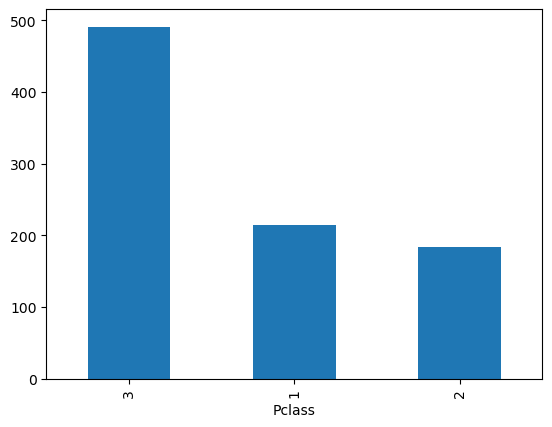

In [23]:
df['Pclass'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

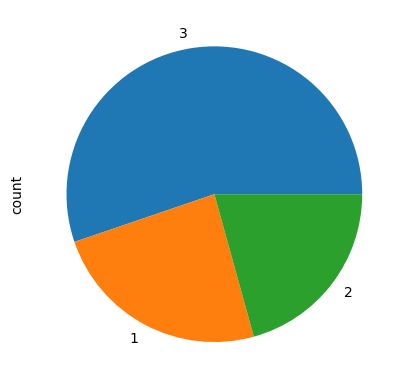

In [24]:
df['Pclass'].value_counts().plot(kind='pie')

The bar plot provides a simple and clear visual representation of how many passengers belong to each passenger class (1st, 2nd, or 3rd).

Write your inferences here.

#### Piechart

<Axes: ylabel='count'>

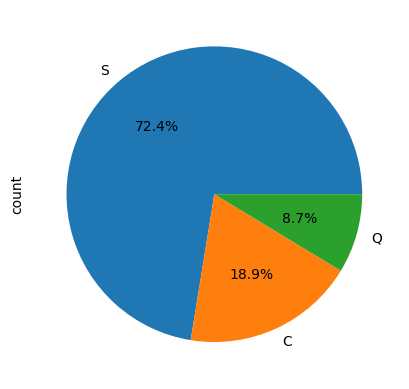

In [25]:
df['Embarked'].value_counts().plot(kind='pie', autopct='%1.1f%%') #add percentage

A pie chart is used for displaying the proportion of categories as parts of a whole. In this case, it helps you easily see the percentage of passengers that embarked from different ports (C = Cherbourg, Q = Queenstown, S = Southampton).

The autopct=`%1.1f%%` parameter automatically labels each slice with the percentage of the total, making it easy to interpret the data.

Write your inferences here.

### Countplot

<Axes: xlabel='Embarked', ylabel='count'>

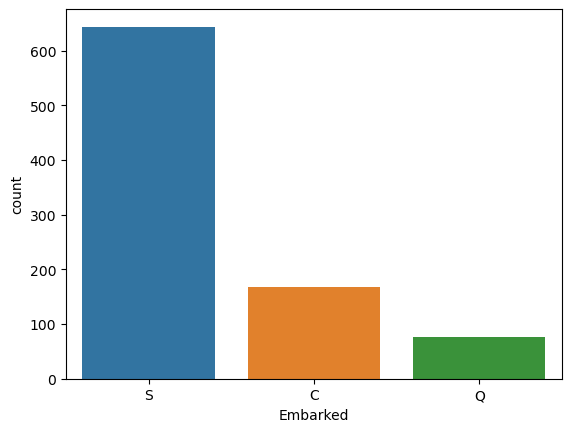

In [26]:
sns.countplot(x=df["Embarked"])

For the Titanic dataset, `sns.countplot(x=df["Embarked"])` will display the count of passengers  embarked from different ports (C = Cherbourg, Q = Queenstown, S = Southampton).


A count plot and a bar plot are similar in the sense that they are both used to visualise categorical data. A countplot counts the number of observations per category, while a barplot may sometimes estimates a summary statistic per category, such as the average.

Write your inferences here.

Moving on, numerical data can either be continuous or discrete. The following plots are typically used for analysing the distribution and spread of continuous variables.

### Kernel Density Plot

<Axes: ylabel='Density'>

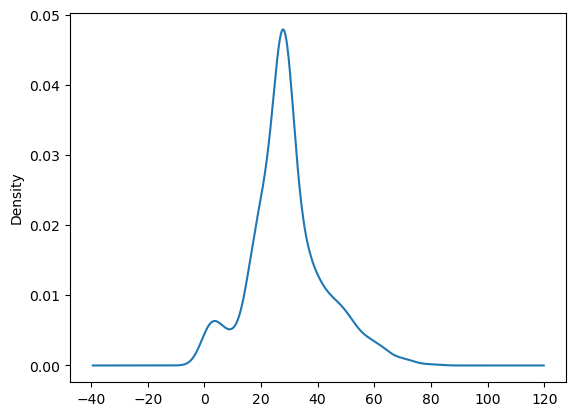

In [27]:
df['Age'].plot(kind='kde')

A KDE plot gives a smooth estimate of the **probability density function (PDF)** of the variable. It’s useful for understanding how the data is distributed in terms of where most values lie.

In this case, it shows the distribution of passenger's ages, helping identify age ranges where there are more passengers.

Write your inferences here.

In [28]:
df['SibSp'].describe()

count    889.000000
mean       0.524184
std        1.103705
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

### Histogram

It is used to see the bucket-wise distribution of a continuous variable.

In [29]:
sns.histplot?

Fare


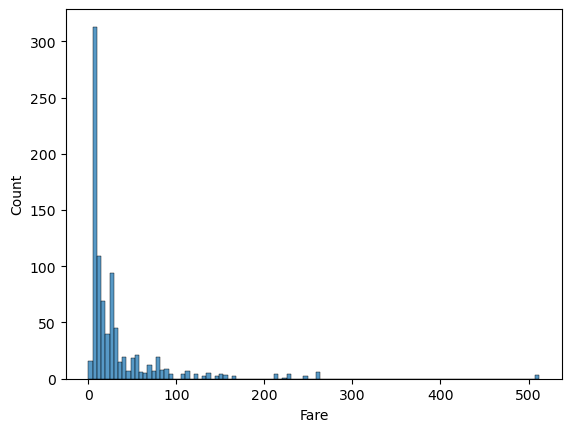

Age


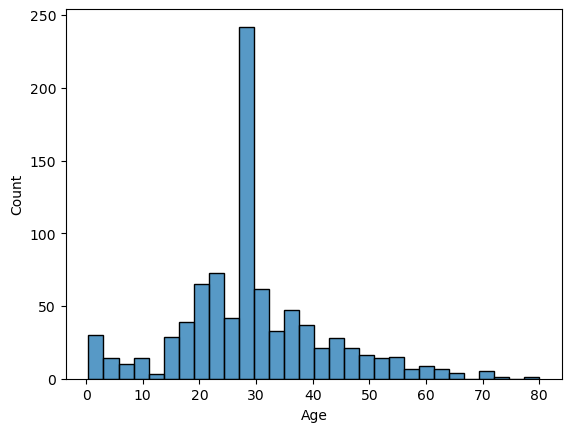

In [30]:
# Looping through each column in the continuous columns list (cont_cols)
for i in cont_cols:

    # Print the name of the current continuous column being processed
    print(i)

    # Plot a histogram for the current column using seaborn's histplot
    sns.histplot(df[i])

    # Display the plot after generating the histogram for the current column
    plt.show()

Fare


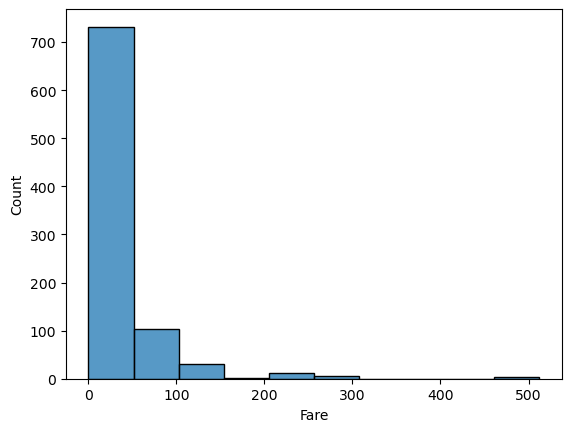

Age


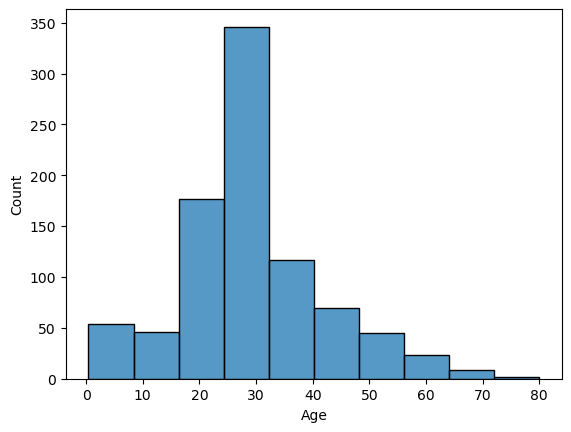

In [31]:
# Looping through each column in the continuous columns list (cont_cols)
for i in cont_cols:

    # Print the name of the current continuous column being processed
    print(i)

    # Plot a histogram for the current column using seaborn's histplot with bins 10
    sns.histplot(df[i],bins=10)

    # Display the plot after generating the histogram for the current column
    plt.show()

Write your inferences here.

### Boxplot

<Axes: >

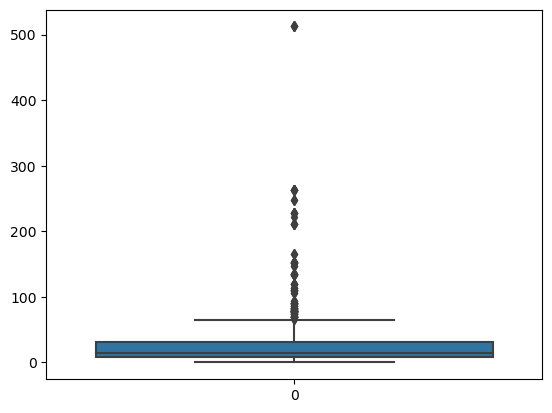

In [32]:
sns.boxplot(df["Fare"])


- It is used to see the quartile-wise distribution of a continuous variable.

- It is also used to see the outliers present in the data.

- Boxplots are also used to see the quartile-wise distribution of a continuous variable against categorical variables (e.g. distribution of sales across various categories).

Write your inferences here.

In [33]:
df["Fare"].describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

### Scatterplot

<Axes: ylabel='Age'>

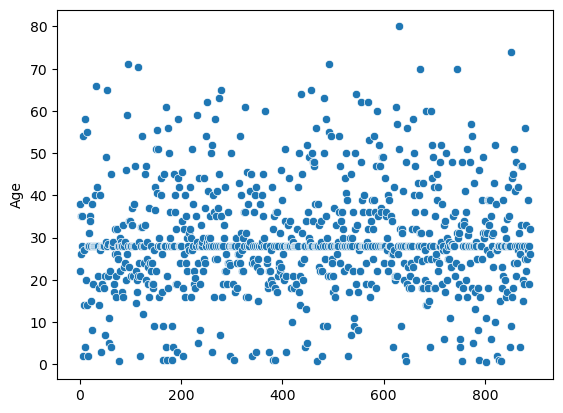

In [34]:
sns.scatterplot(df["Age"])

For the Titanic dataset, `sns.scatterplot(x=df["Age"])` will display the distribution of passengers across different age classes. Scatter plot is generally used for depicting relation between two numerical variables but it can also be used to plot a single numerical variable. It is also known as jittered dot plot.

The `x-axis` represents the index of the DataFrame, which is essentially the row number or the order of the passengers.
The `y-axis` represents the Age of each passenger, giving an overview of how passenger ages are distributed.

Write your inferences here.

# Titanic Data Analysis-II

### Problem Statement:


The goal is to understand the key factors that influenced survival rates on the Titanic by conducting bivariate and multivariate analysis. Specifically, we want to explore the relationships between multiple variables to determine which factors most significantly affected the likelihood of survival.

Key Variables for Analysis:

Dependent Variable:
- Survived (whether a passenger survived or not)

Independent Variables:
- Pclass (Passenger class: socio-economic status)
- Sex (Gender)
- Age
- SibSp (Number of siblings/spouses aboard)
- Parch (Number of parents/children aboard)
- Fare
- Embarked (Port of embarkation)

In [35]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

In [36]:
#Loading the cleaned dataset
df=pd.read_csv('titanic_dataset_cleaned.csv')

In [37]:
df

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
885,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
886,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
887,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [38]:
# List of continuous (numerical) columns in the dataset
cont_cols = ["Fare", "Age"]

# List of categorical columns in the dataset
# Survived, Pclass, Sex, SibSp, Parch, and Embarked are categorical variables
cat_cols = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]

# List of identifier columns in the dataset
# These columns uniquely identify passengers but do not contribute to the analysis
id_cols = ["PassengerId", "Name", "Ticket"]

## Bivariate Analysis

### Boxplot

A continuous variable `Fare`, with a categorical  variable `Pclass`:

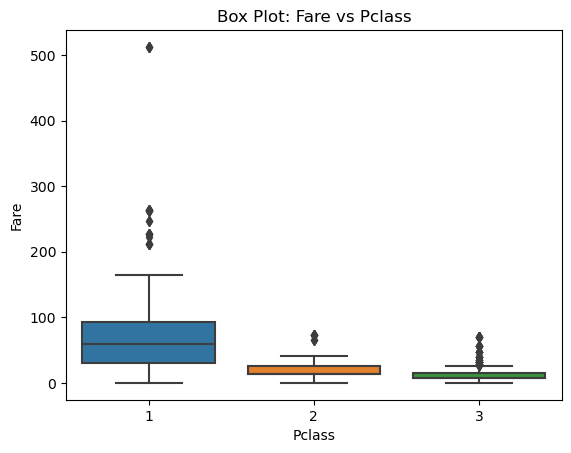

In [39]:
# Boxplot of Fare with Pclass
#sns.boxplot(x='Pclass', y='Fare')
sns.boxplot(x=df["Pclass"],y=df["Fare"])
plt.title('Box Plot: Fare vs Pclass')
plt.show()

### Barplot

It is used to see statistical distribution (mean/median/var/std dev/max/min etc) of a continuous variable against a categorical variable.

<Axes: xlabel='Pclass', ylabel='Fare'>

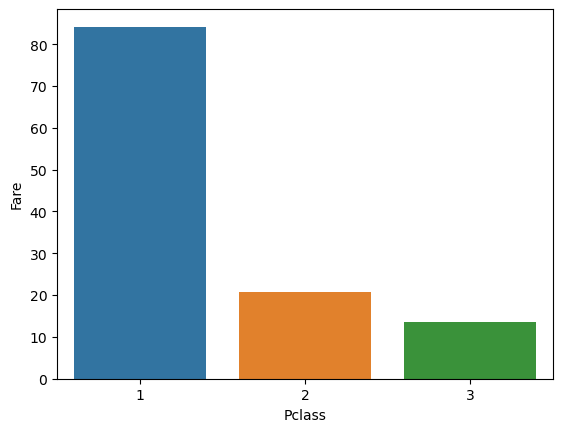

In [40]:
sns.barplot(x=df["Pclass"],y=df["Fare"],ci=None)

By default, the mean fare is plotted for all the classes for the above barplot.

In [41]:
pd.crosstab(df['Sex'], df['Survived'])

Survived,0,1
Sex,,
female,81,231
male,468,109


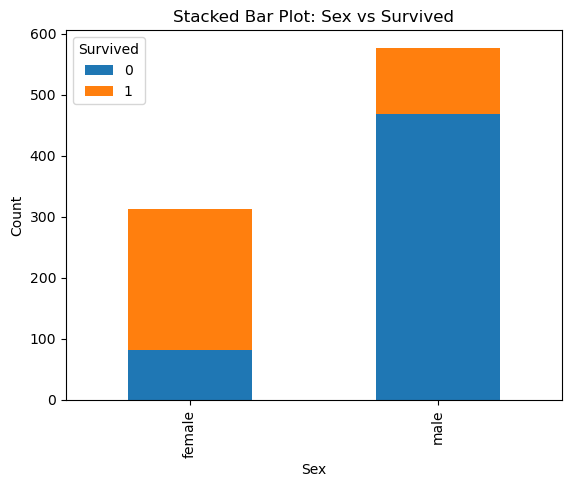

In [42]:
#Plotting a stacked bar chart for Survived and Sex

pd.crosstab(df['Sex'], df['Survived']).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot: Sex vs Survived')
plt.ylabel('Count')
plt.show()

This stacked bar graph (gender vs survived) is an example of categorical-categorical analysis.

### Pairplot

Pairplot is used to see pairwise relationships between two continuous (numerical) variables in a dataset.

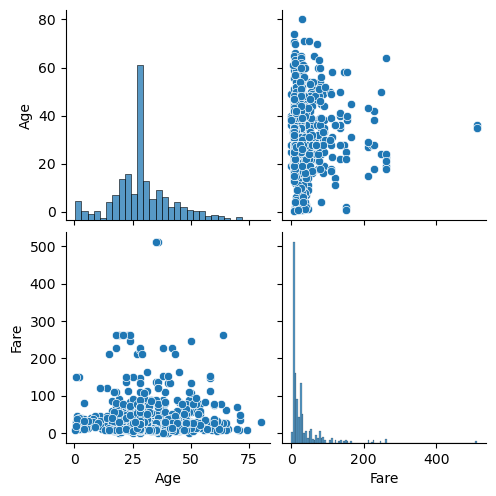

In [43]:
sns.pairplot(df[['Age', 'Fare']].dropna())
plt.show()

### Countplot

Countplot showing the number of passengers by `Pclass` and `Survived`:

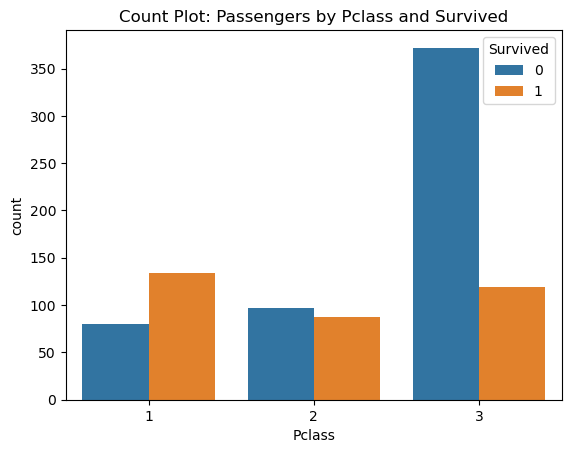

In [44]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Count Plot: Passengers by Pclass and Survived')
plt.show()

### KDE Plot


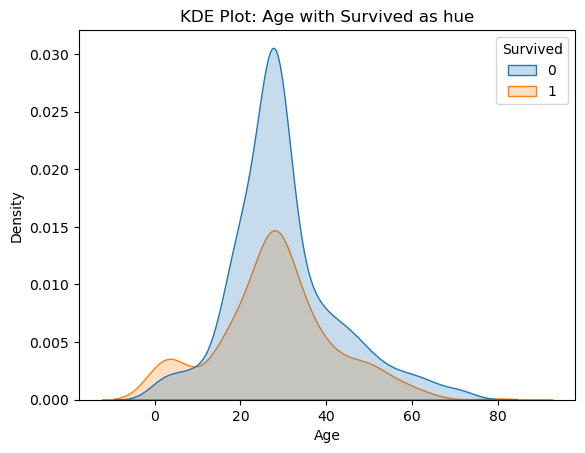

In [45]:
# KDE plot to show density distribution of Age and Fare
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True)
plt.title('KDE Plot: Age with Survived as hue')
plt.show()

## Multivariate Analysis

### Scatterplot

The scatter plot represents the relationship between Age and Fare from the dataset, while also differentiating the data points based on whether the passenger survived or not.

<Axes: xlabel='Age', ylabel='Fare'>

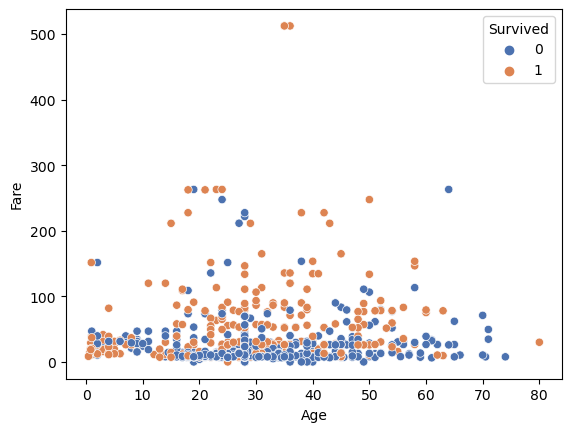

In [46]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', palette='deep')

### Boxplot

A categorical variable `Survived` with a continuous variable `Fare`, with a categorical  variable `Pclass`.

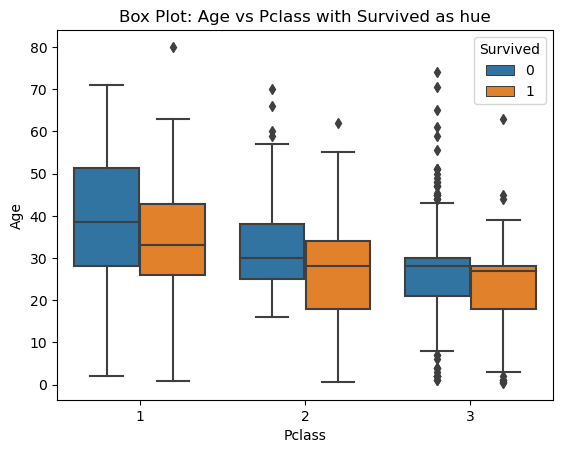

In [47]:
# Box plot of Fare with Survived as hue
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df)
plt.title('Box Plot: Age vs Pclass with Survived as hue')
plt.show()


### Barplot

<Axes: xlabel='Pclass', ylabel='Fare'>

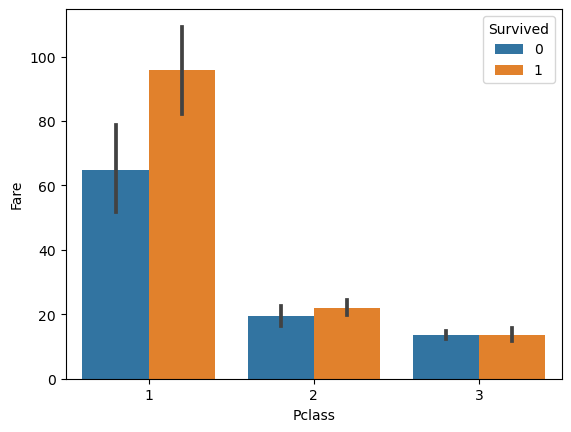

In [48]:
sns.barplot(data=df, x='Pclass', y='Fare', hue='Survived')

The whiskers in the barplot denote confidence intervals (by default, it is 95%).

### Pairplot

Multiple pairwise relationships with categorical variable `Survived`:

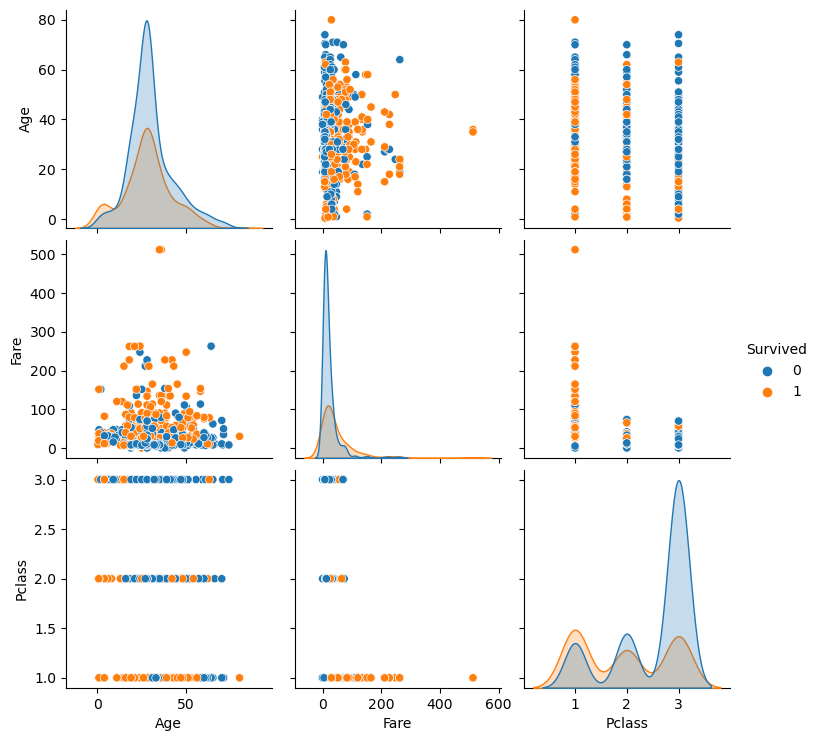

In [49]:
# Pair plot to see pairwise relationships in the dataset
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']].dropna(), hue='Survived')
plt.show()

We can use pairplots (along with hue) for plotting three variables. In this scenario, we used 'Survived' as a hue along with other categorical and numerical variables (like Pclass and Age). Additional inferences can be made w.r.t. the 'hue' component when compared with the 2D pairplots.

### Heatmap

A heatmap showing the correlation between a continuous (numerical) and a categorical variable.

Adjusting the `figsize` for the heatmap:

<Axes: >

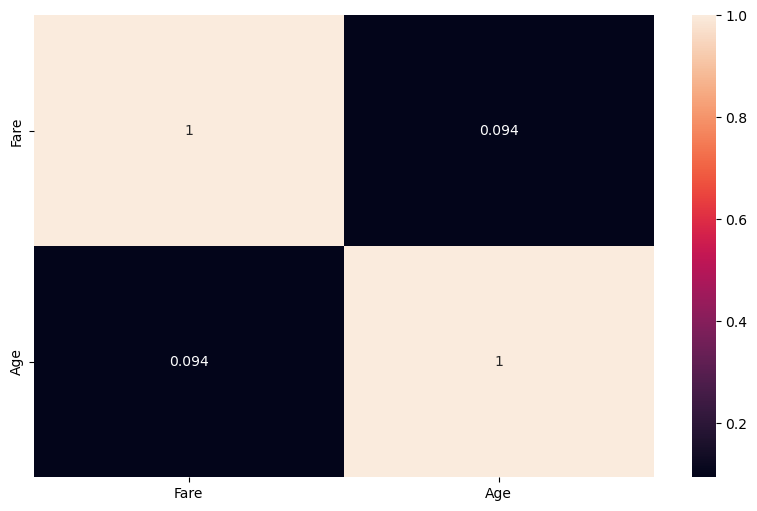

In [50]:
plt.figure(figsize=(10,6))
sns.heatmap(df[cont_cols].corr(),annot=True)

A heatmap showing the correlation between continuous variables (`Age`, `Fare`, etc.) and categorical variables(`Pclass`).

The `corr()` function computes the **Pearson correlation coefficient**, which measures the linear relationship between two variables. The result is a matrix showing the correlation values between the specified columns.

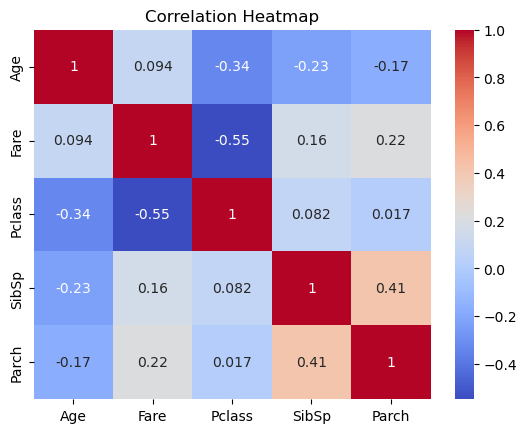

In [51]:
corr_matrix = df[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### KDE Plot

 Kernel density estimate plot for `Fare` and `Age` with hue for `Survived`:

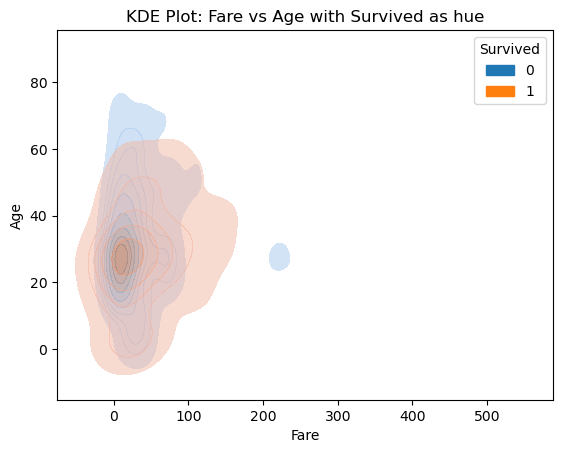

In [52]:
# KDE plot to show density distribution of Age and Fare
sns.kdeplot(data=df, x='Fare', y='Age', hue='Survived', fill=True, alpha=0.5)  # Set alpha for transparency
plt.title('KDE Plot: Fare vs Age with Survived as hue')
plt.show()